In [1]:
import tensorflow as tf

import os
import math
import numpy as np
from PIL import Image
import PIL
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image_dataset_from_directory
from einops import rearrange, reduce
import sys
sys.path.insert(0, '/datadrive/AACS2023')
from fdf256dataset import FDF256Dataset

2023-04-20 10:02:14.449585: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-20 10:02:15.244676: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Could not load pyspng. Defaulting to pillow image backend.


In [2]:
dataset_path = '/datadrive/FDF/dataset/val'
dataset = FDF256Dataset(dirpath=dataset_path, load_keypoints=True, transform=None)

Dataset loaded from: /datadrive/FDF/dataset/val. Number of samples:6531


In [3]:
from torch.utils.data import DataLoader
dataloader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=22,
                            prefetch_factor=2, persistent_workers=True, pin_memory=True)

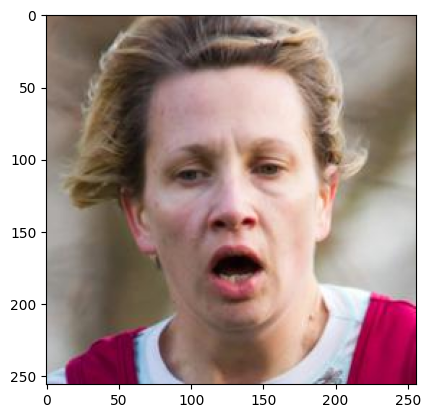

In [4]:
image = next(iter(dataloader))
plt.imshow(image['img'][0])

In [5]:
image['img'].shape

torch.Size([1, 256, 256, 3])

In [6]:
import torch
torch.squeeze(image['img']).shape

torch.Size([256, 256, 3])

In [7]:
import torchvision.transforms as T
import torch
from einops import rearrange

im = reduce(image['img'], "1 h w c -> c h w", 'max')

transform = T.ToPILImage()
image = transform(im)

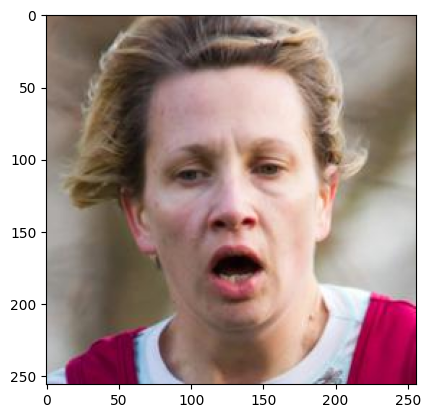

In [8]:
plt.imshow(image)

In [9]:
im.shape

torch.Size([3, 256, 256])

2023-04-20 10:02:25.205725: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


1/1 [==============================] - 0s 114ms/step
PSNR of low resolution image and high resolution image is 30.8980
PSNR of predict and high resolution is 31.3893
SSIM of low resolution image and high resolution image is 0.9004
SSIM of predict and high resolution is 0.9030
Avg. PSNR of lowres images is 30.8980
Avg. PSNR of reconstructions is 31.3893
Avg. SSIM of lowres images is 0.9004
Avg. SSIM of reconstructions is 0.9030


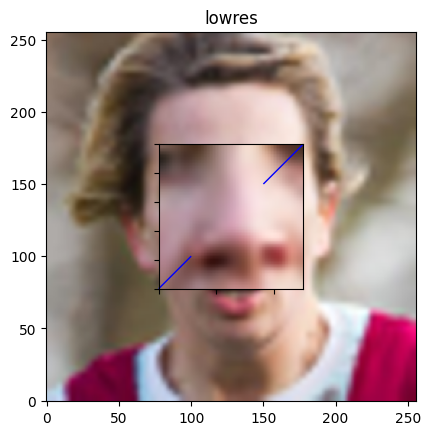

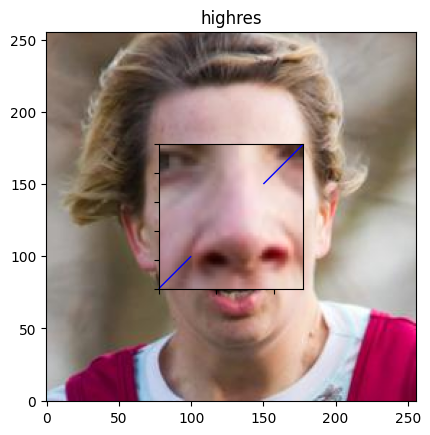

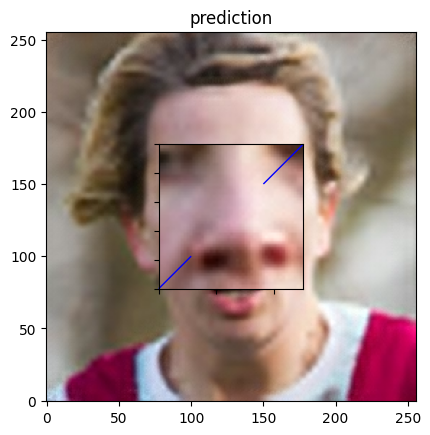

In [10]:
from ESPCN import run_model, plot_results

run_model(model_path="/datadrive/AACS2023/ESPCN/ESPCN_model", images=[image])

In [12]:
# Run the entire dataset through the network
from tqdm import tqdm

images = []

for i in tqdm(range(len(dataset))):
    image = dataset[i]["img"]
    image = reduce(image, "h w c -> c h w", 'max')
    transform = T.ToPILImage()
    image = transform(im)
    images.append(image)
    
average_bicubic_psnr, average_test_psnr, average_bicubic_ssim, average_test_ssim = run_model(model_path="/datadrive/AACS2023/ESPCN/ESPCN_model", images=images, experimental=False)

print(f'Avg. PSNR of lowres images is {average_bicubic_psnr}, Avg. PSNR of reconstructions is {average_test_psnr}')
print(f'Avg. SSIM of lowres images is {average_bicubic_ssim}, Avg. SSIM of reconstructions is {average_test_ssim}')

100%|██████████| 6531/6531 [00:14<00:00, 436.23it/s]


1/1 [==============================] - 0s 22ms/step
Avg. PSNR of lowres images is 30.895679473876953, Avg. PSNR of reconstructions is 31.39037322998047
Avg. SSIM of lowres images is 0.9003512859344482, Avg. SSIM of reconstructions is 0.9030445218086243
